# Multi Linear Regression Assignment

### Data Set : 50_Startups 

# 1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
company_status = pd.read_csv('50_Startups.csv')
company_status

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 3. Data Understanding

## a) Initial Analysis:

In [3]:
company_status.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
company_status.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
company_status.shape

(50, 5)

In [6]:
company_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
company_status.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
company_status.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
company_status.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [10]:
company_data = company_status.rename({'R&D Spend':'RnD_Spend','Marketing Spend':'M_Spend'},axis = 1)
company_data
company_data.head()

,RnD_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## b) Correlation Matrix:

In [11]:
company_data.corr()

,RnD_Spend,Administration,M_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
M_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


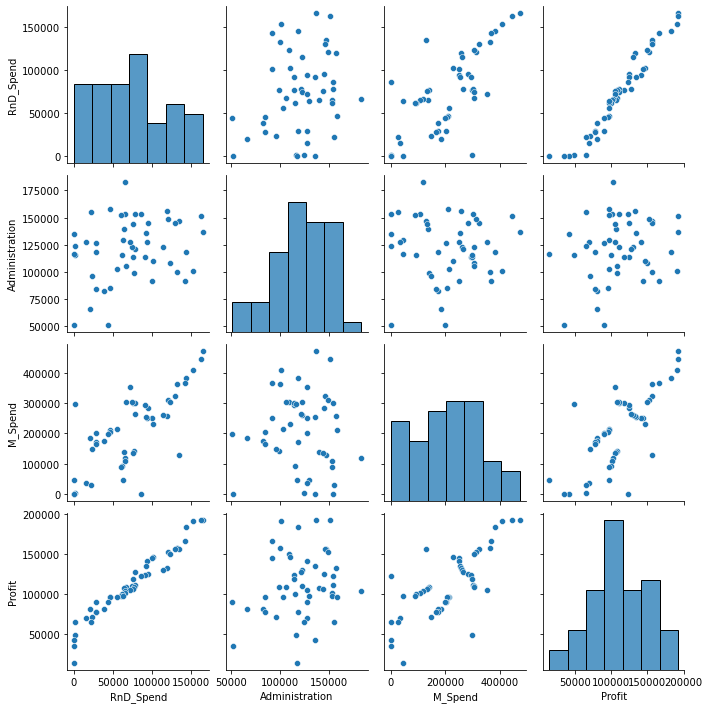

In [12]:
sns.pairplot(data = company_data.iloc[:,:])
plt.show()

# 4. Perform Assumption Check 

## a) Linearity Test:

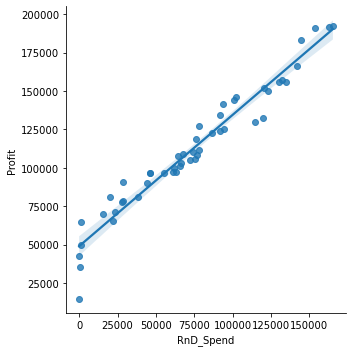

In [13]:
sns.lmplot(x = 'RnD_Spend', y = 'Profit', data = company_data)
plt.show()

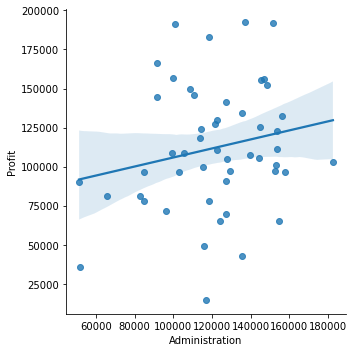

In [14]:
sns.lmplot(x = 'Administration', y = 'Profit', data = company_data)
plt.show()

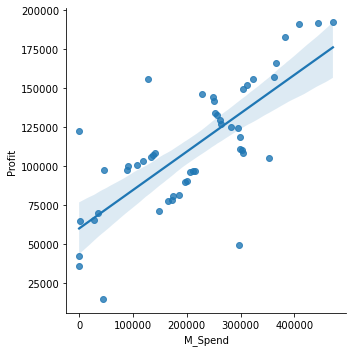

In [15]:
sns.lmplot(x = 'M_Spend', y = 'Profit', data = company_data)
plt.show()

##### Hence Linearity Test is Failed. Because not all inputs are having the linear relationship with output. 

## b) Normality Test:

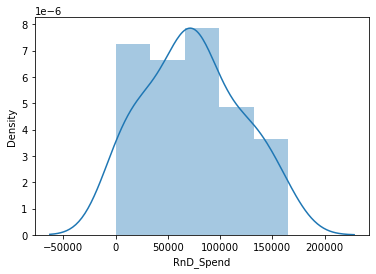

In [16]:
sns.distplot(company_data['RnD_Spend'])
plt.show()

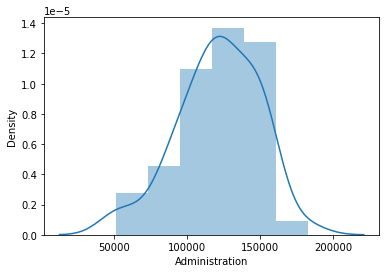

In [17]:
sns.distplot(company_data['Administration'])
plt.show()

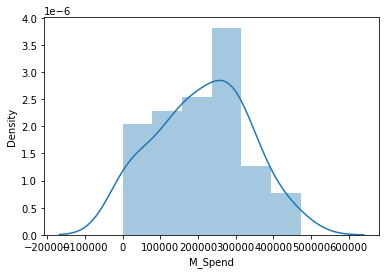

In [18]:
sns.distplot(company_data['M_Spend'])
plt.show()

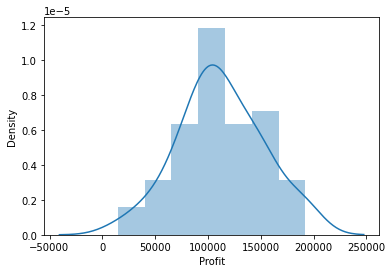

In [19]:
sns.distplot(company_data['Profit'])
plt.show()

##### Hence Normality Test is Passed. Because from the above plots we can say that input data is fairly symmetrical.

# 5. Model Building || 6. Model Training 

In [20]:
company_data.columns

Index(['RnD_Spend', 'Administration', 'M_Spend', 'State', 'Profit'], dtype='object')

In [21]:
company_model = smf.ols(formula = 'Profit~RnD_Spend+Administration+M_Spend', data = company_data).fit()
company_model

In [22]:
company_model.params

Intercept         50122.192990
RnD_Spend             0.805715
Administration       -0.026816
M_Spend               0.027228
dtype: float64

In [23]:
company_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        17:22:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 1:

In [24]:
company_model_1 = smf.ols(formula = 'Profit~RnD_Spend', data = company_data).fit()
print('R2Score     :',company_model_1.rsquared.round(4)) 
print('Adj.R2Score :',company_model_1.rsquared_adj.round(4))
print('AIC Value   :',company_model_1.aic.round(4)) 
print('BIC Value   :',company_model_1.bic.round(4)) 
print('P-Value     :\n',company_model_1.pvalues)
print('t-value     :\n',company_model_1.tvalues)

R2Score     : 0.9465
Adj.R2Score : 0.9454
AIC Value   : 1058.873
BIC Value   : 1062.6971
P-Value     :
 Intercept    2.782697e-24
RnD_Spend    3.500322e-32
dtype: float64
t-value     :
 Intercept    19.320288
RnD_Spend    29.151139
dtype: float64


In [25]:
company_model_1.params

Intercept    49032.899141
RnD_Spend        0.854291
dtype: float64

In [26]:
company_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           3.50e-32
Time:                        17:22:42   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD_Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2:

In [27]:
company_model_2 = smf.ols(formula = 'Profit~RnD_Spend+Administration', data = company_data).fit()
print('R2Score     :',company_model_2.rsquared.round(4)) 
print('Adj.R2Score :',company_model_2.rsquared_adj.round(4))
print('AIC Value   :',company_model_2.aic.round(4)) 
print('BIC Value   :',company_model_2.bic.round(4)) 
print('P-Value     :\n',company_model_2.pvalues)
print('t-value     :\n',company_model_2.tvalues)

R2Score     : 0.9478
Adj.R2Score : 0.9456
AIC Value   : 1059.6637
BIC Value   : 1065.3998
P-Value     :
 Intercept         5.695336e-12
RnD_Spend         2.278348e-31
Administration    2.888932e-01
dtype: float64
t-value     :
 Intercept          9.122352
RnD_Spend         28.588870
Administration    -1.072677
dtype: float64


In [28]:
company_model_2.params

Intercept         54886.620628
RnD_Spend             0.862118
Administration       -0.052995
dtype: float64

In [29]:
company_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           7.29e-31
Time:                        17:22:44   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RnD_Spend          0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 3:

In [30]:
company_model_3 = smf.ols(formula = 'Profit~RnD_Spend+Administration+M_Spend', data = company_data).fit()
print('R2Score     :',company_model_3.rsquared.round(4)) 
print('Adj.R2Score :',company_model_3.rsquared_adj.round(4))
print('AIC Value   :',company_model_3.aic.round(4)) 
print('BIC Value   :',company_model_3.bic.round(4)) 
print('P-Value     :\n',company_model_3.pvalues)
print('t-value     :\n',company_model_3.tvalues)

R2Score     : 0.9507
Adj.R2Score : 0.9475
AIC Value   : 1058.7715
BIC Value   : 1066.4196
P-Value     :
 Intercept         1.057379e-09
RnD_Spend         2.634968e-22
Administration    6.017551e-01
M_Spend           1.047168e-01
dtype: float64
t-value     :
 Intercept          7.626218
RnD_Spend         17.846374
Administration    -0.525507
M_Spend            1.655077
dtype: float64


In [31]:
company_model_3.params

Intercept         50122.192990
RnD_Spend             0.805715
Administration       -0.026816
M_Spend               0.027228
dtype: float64

In [32]:
company_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        17:22:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Comparing all Models the Model_3 has best Rsquared value i.e 0.9507. Hence we can predict the model

# 

## Measuring Variance Inflation Factor (VIF) :

In [33]:
Rsq_profit = smf.ols('Profit~RnD_Spend+Administration+M_Spend',data = company_data).fit().rsquared  
VIF_profit = 1/(1-Rsq_profit) 

Rsq_RDspend = smf.ols('RnD_Spend~Profit+Administration+M_Spend',data = company_data).fit().rsquared  
VIF_RDspend = 1/(1-Rsq_RDspend) 

Rsq_Admin = smf.ols('Administration~Profit+RnD_Spend+M_Spend',data = company_data).fit().rsquared  
VIF_Admin = 1/(1-Rsq_Admin)

Rsq_MSpend = smf.ols('M_Spend~Administration+Profit+RnD_Spend',data = company_data).fit().rsquared  
VIF_MSpend = 1/(1-Rsq_MSpend)

# Storing VIF values in a data frame
frame = {'Variables':['profit','RnD_Spend','Administration','M_Spend'],'VIF':[VIF_profit,VIF_RDspend,VIF_Admin,VIF_MSpend]}
VIF_frame = pd.DataFrame(frame)  
VIF_frame

,Variables,VIF
0,profit,20.302917
1,RnD_Spend,19.563001
2,Administration,1.182146
3,M_Spend,2.465332


# 7. Model Testing - Residual Analysis

## 7.1 Normality of Residuals (Q-Q plot):

In [34]:
import statsmodels.api as sm

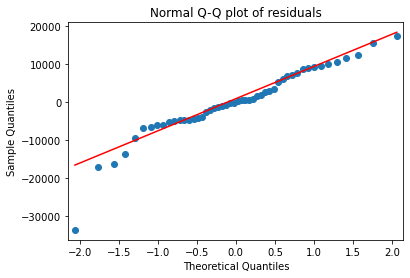

In [35]:
qq_plot = sm.qqplot(data = company_model.resid , line = 'q' )
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [36]:
list(np.where(company_model.resid < -30000))

[array([49], dtype=int64)]

## 7.2 Residual Plot for Homoscedasticity:

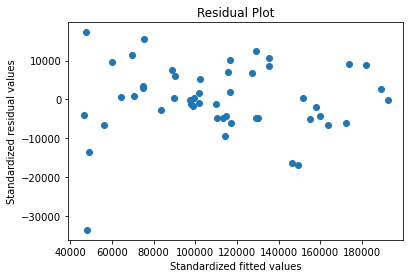

In [37]:
plt.scatter((company_model.fittedvalues),(company_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

##### There is no pattern in the Residual plot, it is considered to be a good model equation.

## 7.3 Residual Vs Regressors:

eval_env: 1


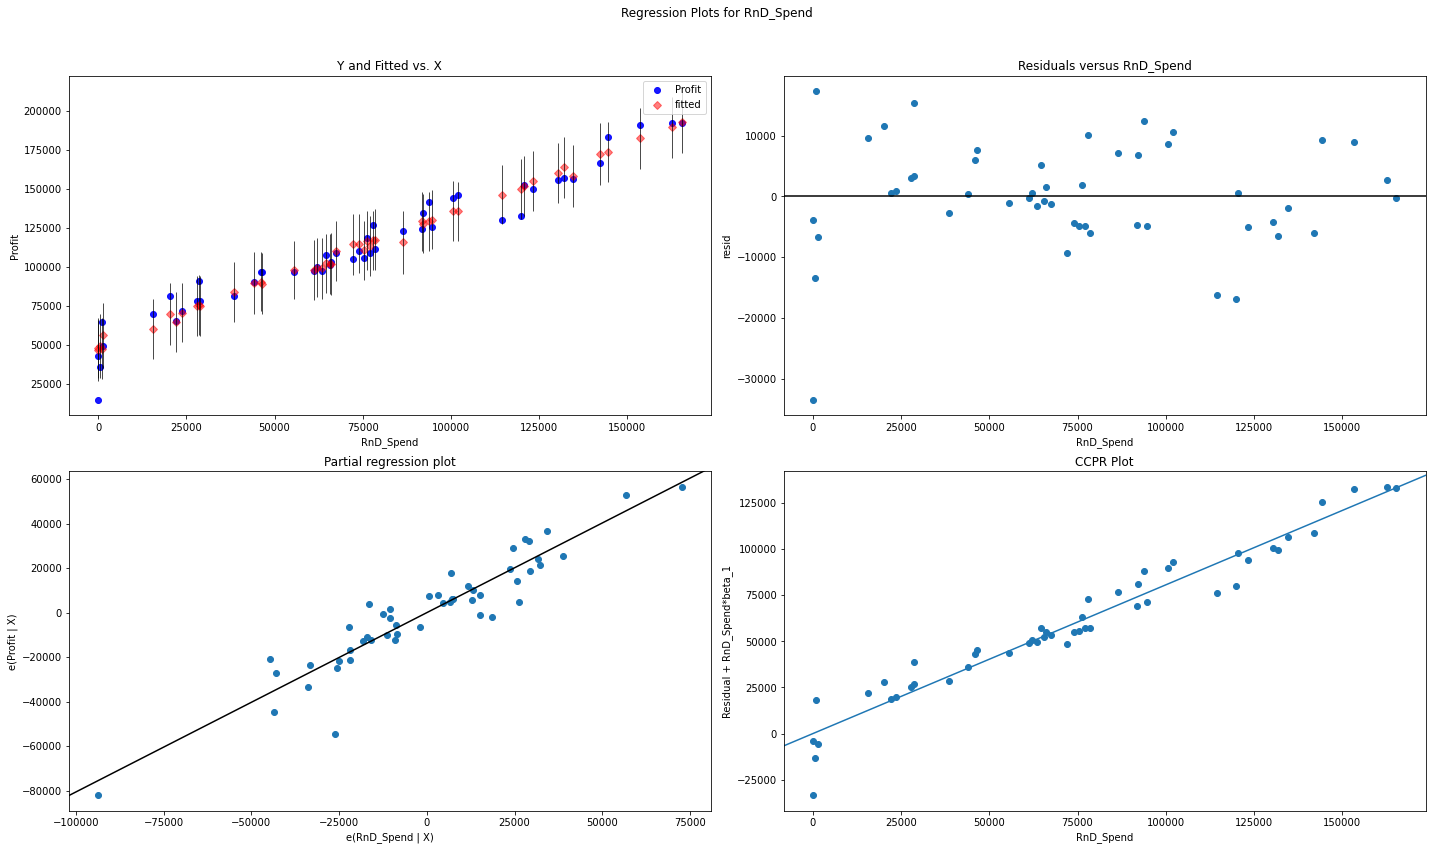

In [38]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(company_model,'RnD_Spend',fig = figsize)
plt.show()

eval_env: 1


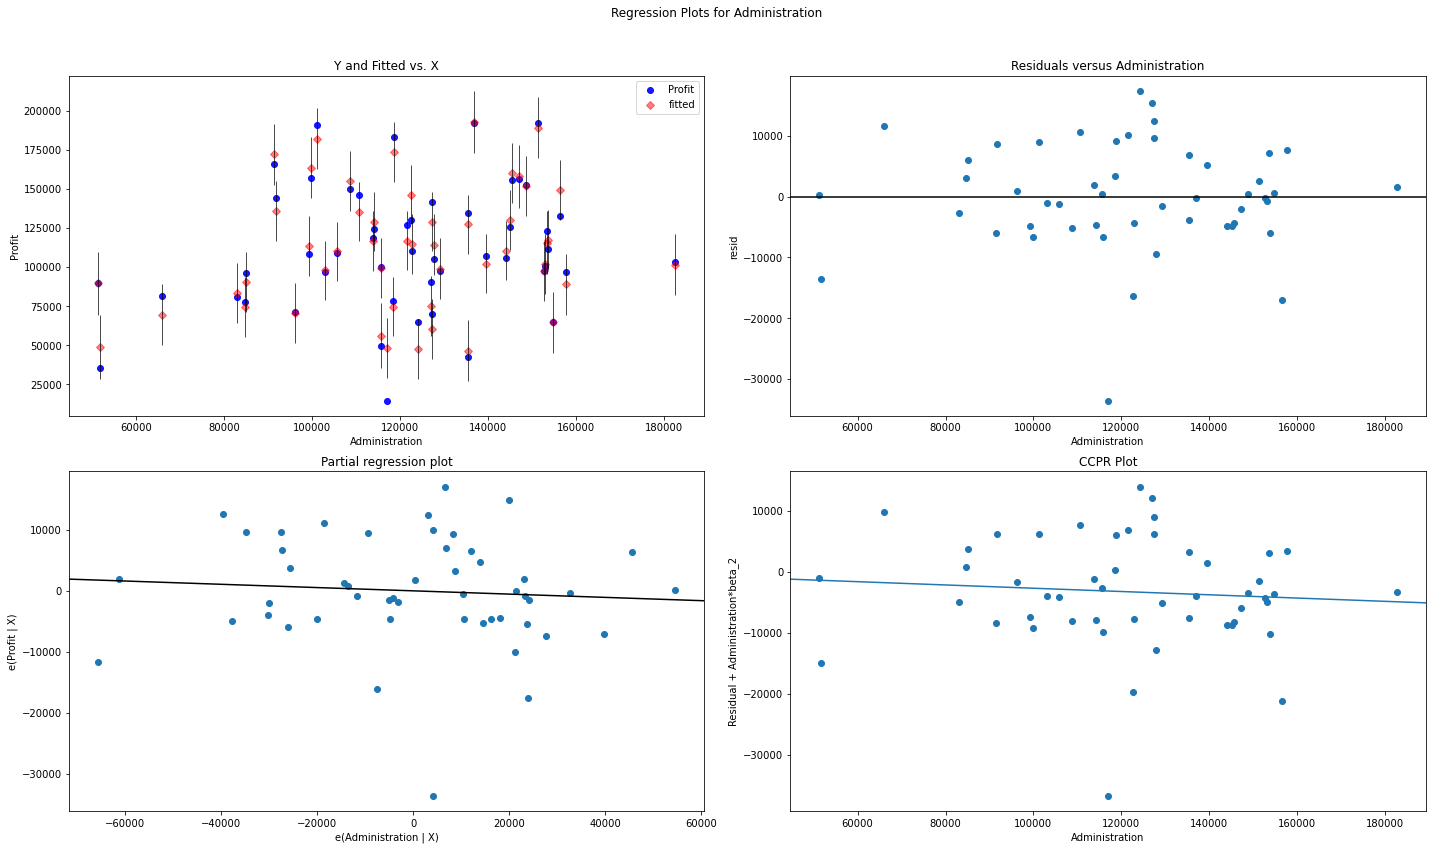

In [39]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(company_model,'Administration',fig = figsize)
plt.show()

eval_env: 1


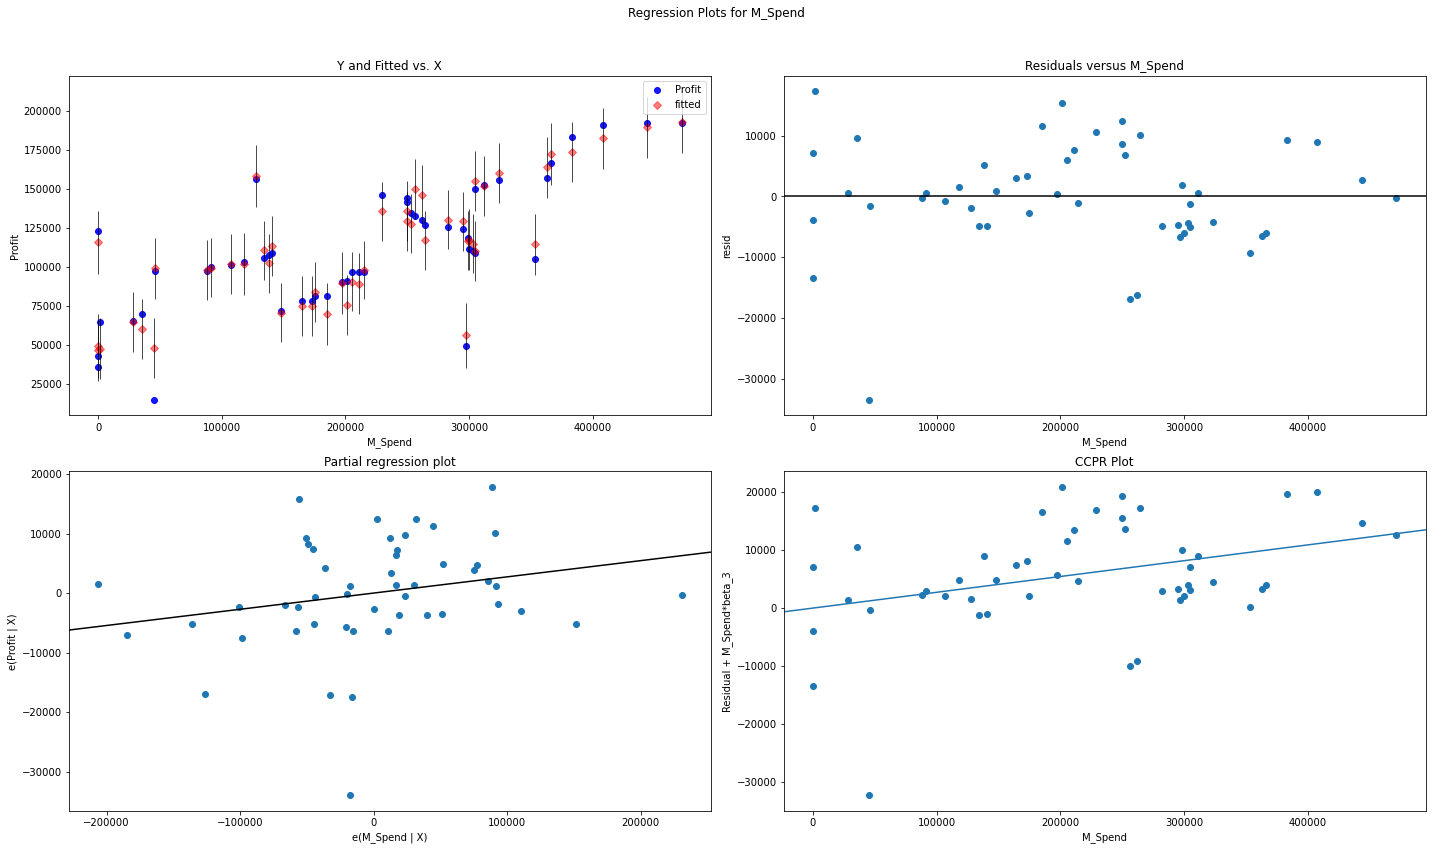

In [40]:
figsize = plt.figure(figsize = (20,12))
figsize = sm.graphics.plot_regress_exog(company_model,'M_Spend',fig = figsize)
plt.show()

## 7.4 Model Deletion Dignostics:
Detecting influencers/outliers

### Using Cook's Distance

In [41]:
model_influencers = company_model.get_influence()
(a,_) = model_influencers.cooks_distance

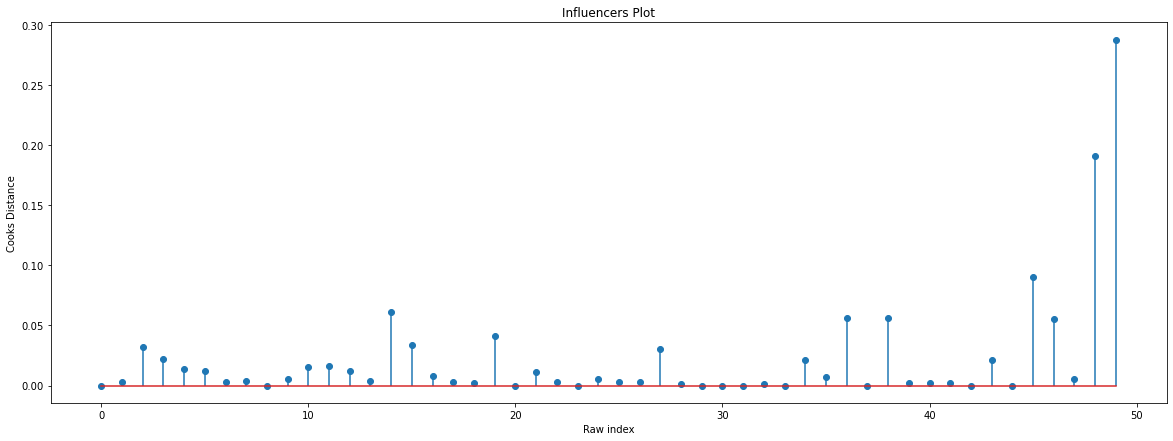

In [42]:
#Plot the influencers values using stem plot
plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(company_data)),np.round(a,3))
plt.title('Influencers Plot')
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#Index and values of influencer
(np.argmax(a), np.max(a))

(49, 0.2880822927543263)

### High Influence Point

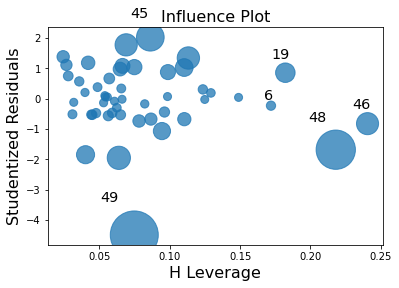

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(company_model)
plt.show()

In [45]:
k = company_data.shape[1]
n = company_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [46]:
leverage_cutoff

0.36

# 

# 8. Checking if there is any improvement in the Rsquare and AIC if we delete State variable

## a) Deleting State Column:

In [47]:
copy = company_data.copy()
copy.head()

,RnD_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
company_data_1 = copy.drop('State', axis = 1)
company_data_1
company_data_1.head()

,RnD_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Model 4:

In [49]:
company_model_4 = smf.ols('Profit~RnD_Spend+Administration+M_Spend',data = company_data_1).fit()
company_model_4

In [50]:
company_model_4.params

Intercept         50122.192990
RnD_Spend             0.805715
Administration       -0.026816
M_Spend               0.027228
dtype: float64

In [51]:
company_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        17:23:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### There is no improvement in Rsquare value after deleting a State Column.

# 

### Again Checking if there is any improvement in the Rsquare and AIC value if we delete one column

## b) Deleting 49th row:

In [52]:
copy_1 = company_data.copy()
copy_1

,RnD_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [53]:
company_data[company_data.index.isin([49])]

,RnD_Spend,Administration,M_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [54]:
company_data_2 = copy_1.drop(copy.index[[49]],axis = 0)
company_data_2

,RnD_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model 5:

In [55]:
company_data_2.columns

Index(['RnD_Spend', 'Administration', 'M_Spend', 'State', 'Profit'], dtype='object')

In [56]:
company_model_5 = smf.ols(formula = 'Profit~RnD_Spend+Administration+M_Spend', data = company_data_2).fit()
company_model_5

In [57]:
company_model_5.params

Intercept         52382.439251
RnD_Spend             0.783002
Administration       -0.022201
M_Spend               0.025234
dtype: float64

In [58]:
company_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           8.85e-32
Time:                        17:23:10   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD_Spend          0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
M_Spend            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As the value of the data point of 49th is less than 1, we can now stop the diagnostic process and finalize the model.

# 

# 9. Predicting For New Data:

In [59]:
#New data for prediction
new_data = pd.DataFrame({'RnD_Spend':150000, "Administration": 100000, "M_Spend":900000}, index = [1])
new_data

,RnD_Spend,Administration,M_Spend
1,150000,100000,900000


In [60]:
company_model_5.predict(new_data)

1    190322.845555
dtype: float64

# Result : Profit for the given data set would be 190322.845555

## From the Model 5 we get to know that after deleting a row we have been updated a new high Rsquare value i.e 0.961

### Hence Model 5 is Better Model To predict for profit of 50_startups data.